# FPN-Watershed Inference Demo

**Prerequisite: Please see this document first:** [Here](https://github.com/CBIIT/nci-hitif/blob/master/framework-nucleus-segmentation/inference/README.md)

### Import all python dependencies for FPN-Watershed.

In [1]:
%%capture
import sys,glob
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
from skimage.util import img_as_ubyte
from skimage.color import label2rgb

### Import FPN-Watershed inference python modules. Main source code is located [Here](https://github.com/CBIIT/nci-hitif/blob/master/framework-nucleus-segmentation/inference/watershed/src/watershed_infer.py) 

In [2]:
%%capture
sys.path.insert(1, '../src');
sys.path.insert(1,'../../../visualization')
from watershed_infer import *
from download_util import *

### Download pretrained model weights for FPN-watershed implementations.

This implementation uses two different models-- the Blurred Border FPN model (pre-trained with ImageNet) and the Distance Map FPN model (pre-trained with ImageNet).

In [3]:
%%capture
BLUR_MODEL_URL = 'https://ndownloader.figshare.com/files/22280349?private_link=a3fec498ef6d08ac6973'
BLUR_MODEL_PATH = 'blurred_border_FPN_pretrained.zip'
download_and_unzip_datasets(BLUR_MODEL_URL, BLUR_MODEL_PATH)

modelwtsfname = "./blurred_border_FPN_pretrained.npy"
modeljsonfname = "./blurred_border_FPN_pretrained.json"
gaussian_blur_model = get_model(modeljsonfname,modelwtsfname)

In [4]:
%%capture
DISTANCE_MAP_MODEL_URL = 'https://ndownloader.figshare.com/files/22280352?private_link=5b1454e3f3bd23dea56f'
DISTANCE_MAP_MODEL_PATH = 'distance_map_FPN_pretrained.zip'
download_and_unzip_datasets(DISTANCE_MAP_MODEL_URL, DISTANCE_MAP_MODEL_PATH)

modelwtsfname = "./distance_map_FPN_pretrained.npy"
modeljsonfname = "./distance_map_FPN_pretrained.json"
distance_map_model = get_model(modeljsonfname,modelwtsfname)

### Setup configuration file path. 

The configurations of this inference demo are in **[demo.ini](https://github.com/CBIIT/nci-hitif/blob/master/framework-nucleus-segmentation/inference/watershed/demo/demo.ini)**. For your own implementations, please modify the configurations a bit to fit your task. 

In [4]:
config_file_path='./demo.ini'
with open(config_file_path, 'r') as fin:
    print(fin.read())

[general]
global_threshold = 0.67
padded_width = 1280
padded_height =  1088
batch_size = 1
label_min_size = 5
label_max_size = 100000



### Read sample cell images.

3 Different cell images are used in this demo.

In [5]:
%%capture
image_list =['../../../visualization/GreyScale/HiTIF_Laurent_Technical/AUTO0496_J14_T0001F001L01A01Z01C01.tif',
             '../../../visualization/GreyScale/BABE_Technical/image_0.tif',
             '../../../visualization/GreyScale/HiTIF_Colorectal_Biological/AUTO0218_N07_T0001F004L01A01Z01C01.tif',
             '../../../visualization/GreyScale/Manasi_Technical/Plate1_M21_T0001F003L01A01Z01C01.tif'
]

img = np.zeros((len(image_list),1078,1278))
for i in range(len(image_list)):
    image_resized = img_as_ubyte(resize(np.array(Image.open(image_list[i])), (1078, 1278)))
    img[i,:,:] = image_resized

### Visualize sample input images.

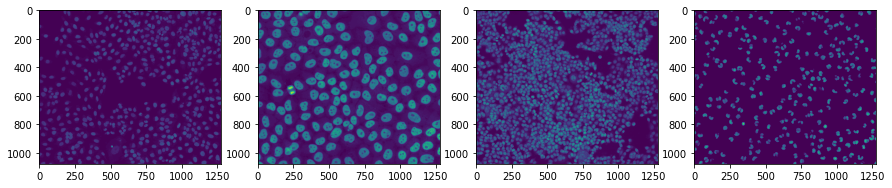

In [7]:
pf, axarr = plt.subplots(1,4)
for i in range(4):    
    axarr[i].imshow(img[i])
plt.rcParams['figure.figsize'] = [15, 15]

### Run Instance Segmentation. 

Following is the syntax of watershed_infer.

**watershed_infer(img,gaussian_blur_model,distance_map_model,config_file_path)**

- img: source input image (numpy format). The dimension of this array is (N x height x width). (N: the number of images)
- gaussian_blur_model: pre-trained Gaussian Blur Model file.
- distance_map_model: pre-trained Distance Map Model file.
- config_file_path: configuration file path. (e.g., demo.ini)

In [9]:
%%capture
mask = watershed_infer(img,gaussian_blur_model,distance_map_model,config_file_path)

### Visualize Output images.

In [10]:
print(mask.shape)

(3, 1078, 1278)


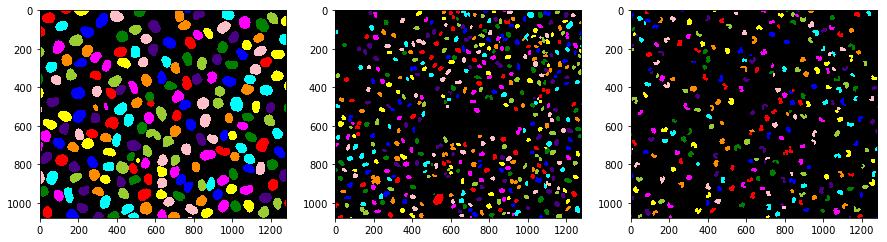

In [11]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(label2rgb(mask[0],bg_color=(0, 0, 0),bg_label=0))
axarr[1].imshow(label2rgb(mask[1],bg_color=(0, 0, 0),bg_label=0))
axarr[2].imshow(label2rgb(mask[2],bg_color=(0, 0, 0),bg_label=0))
plt.rcParams['figure.figsize'] = [15, 15]